In [38]:
import numpy as nmp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as sts
%matplotlib inline

alpha = 0.95
N_10 = 10
N_100 = 100
num_dist = 1000

# так как для разных распределения подсчет ведется одинаково
# напишем функции, которые будут это считать

# X - распределение
# min_theta - функция определения начала отрезка
# max_theta - функция определения конца отрезка
# a, b - границы всего отрезка

def build_interval(dist, min_theta, max_theta, a, b):
    for i in range(0, 2):
        if i == 0:
            N = N_10
        if i == 1:
            N = N_100
        # разбиение по оси X
        x_0 = nmp.arange(1, N + 1, 1)
        # массив начал отрезков
        y_1 = nmp.zeros(N)
        # массив концов отрезков
        y_2 = nmp.zeros(N)

        for n in range(1, N + 1):
            y_1[n - 1] = min_theta(dist[:n], n)
            y_2[n - 1] = max_theta(dist[:n], n)

        fig = plt.figure(figsize=(20, 10))
        if i == 0:
            plt.fill_between(x_0, y_1, y_2, color = 'red')
        if i == 1:
            plt.fill_between(x_0, y_1, y_2, color = 'yellow')

        plt.axis([0, N, a, b])
        plt.title(r'N = ' + str(N))
        plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, prop={'size':25},
                   borderaxespad = 0.)

        plt.show()


# dist - распределение
# param - параметр
# min_theta - функция определение начала отрезка
# max_theta - функция определения конца отрезка
# interval - отрезок
def test_interval(dist, param, min_theta, max_theta, interval):
    result = []
    for n in interval:
        d = 0
        for j in range(num_dist):
            Y = dist(n)
            # если параметр попадает в интервал, то увеличивем d
            if min_theta(Y, n) < param < max_theta(Y, n):
                d = d + 1
        # записываем кол-во попаданий в интервал
        result.append(d / num_dist)
    print(result) 

Комменатрий ко всем графикам: 

Уровень доверия равен $\alpha$

$z$ - квантиль нормального распределения уровня $\frac{\alpha + 1}{2}$ 

[1.0, 1.0]


C:\Users\Irina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


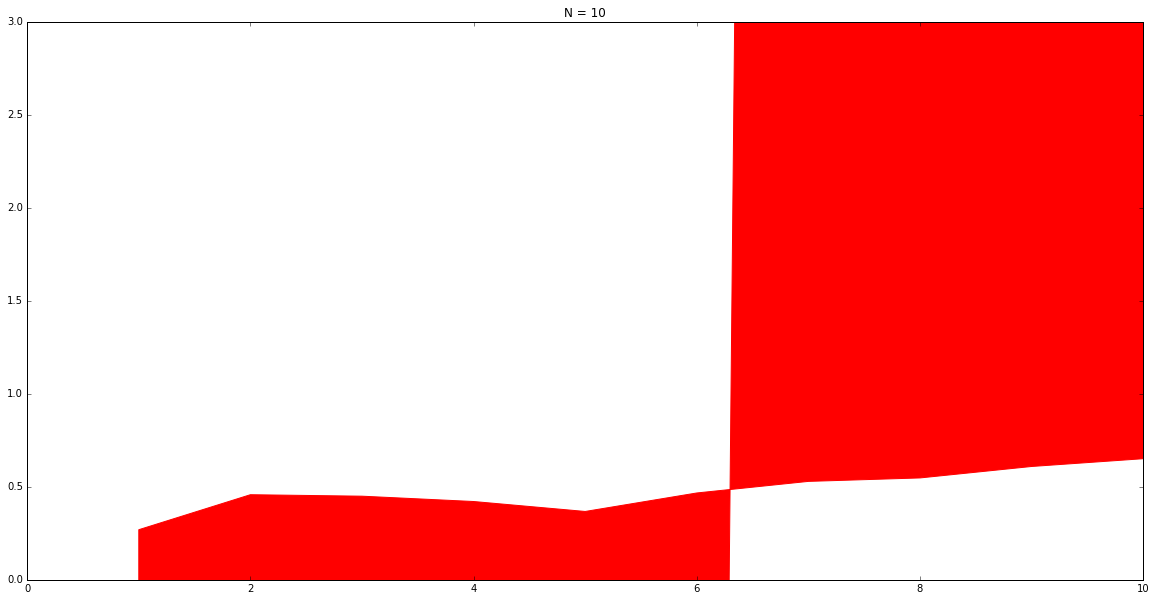

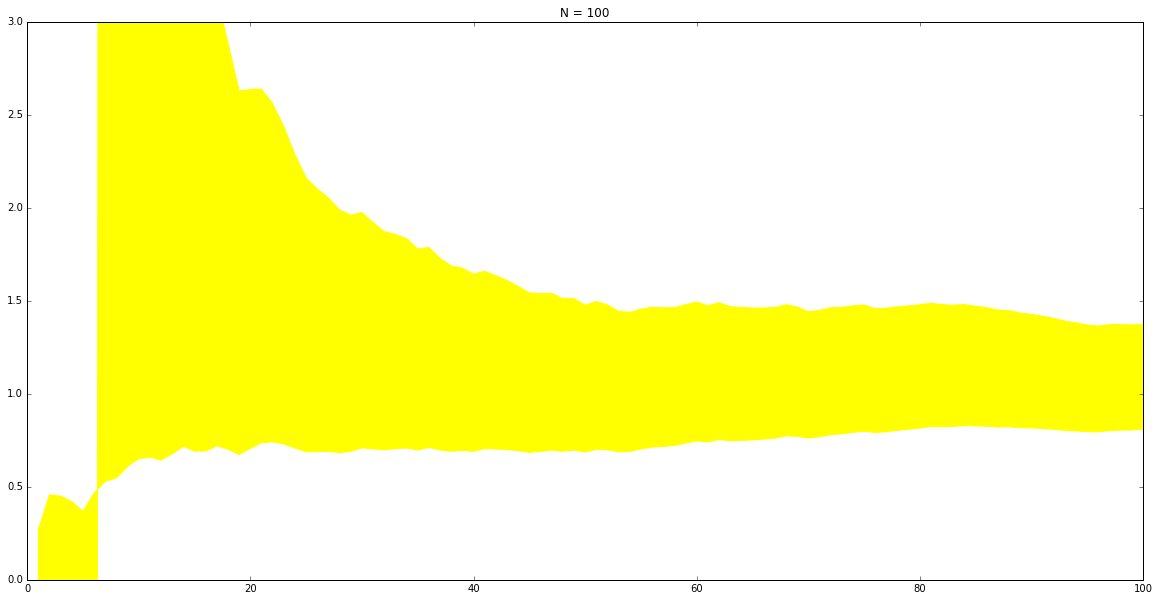

In [45]:
test_interval((lambda n: nmp.random.uniform(0, 1, n)), 
              1,
              (lambda x, n: 2 * nmp.mean(x) / (1 + (3 * n * (1 - alpha)) ** -0.5)), 
              (lambda x, n: 2 * nmp.mean(x) / (1 - (3 * n * (1 - alpha)) ** -0.5)),
              [10, 100])

build_interval(nmp.random.uniform(0, 1, N), 
              (lambda x, n: 2 * nmp.mean(x) / (1 + (3 * n * (1 - alpha)) ** -0.5)), 
              (lambda x, n: 2 * nmp.mean(x) / (1 - (3 * n * (1 - alpha)) ** -0.5)),
              0, 3)

Доверительный интервал для $U(0, \theta)$ - $(\frac{2 \overline X}{1 + \sqrt{3n(1-\alpha)}}, \frac{2 \overline X}{1 - \sqrt{3n(1-\alpha)}})$.

[0.939, 0.948]


C:\Users\Irina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


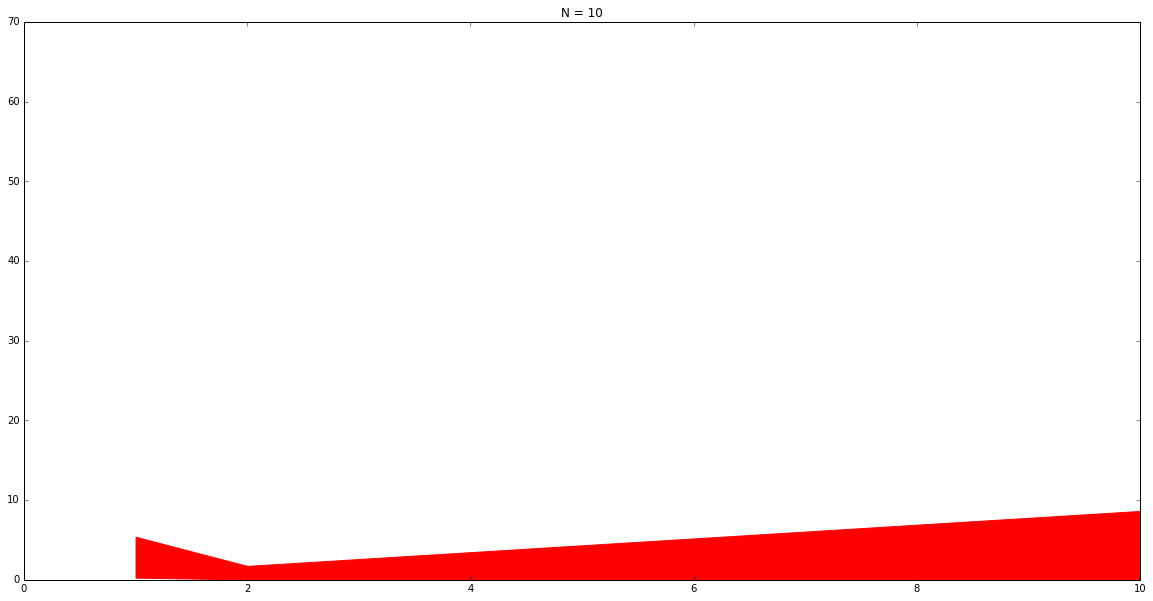

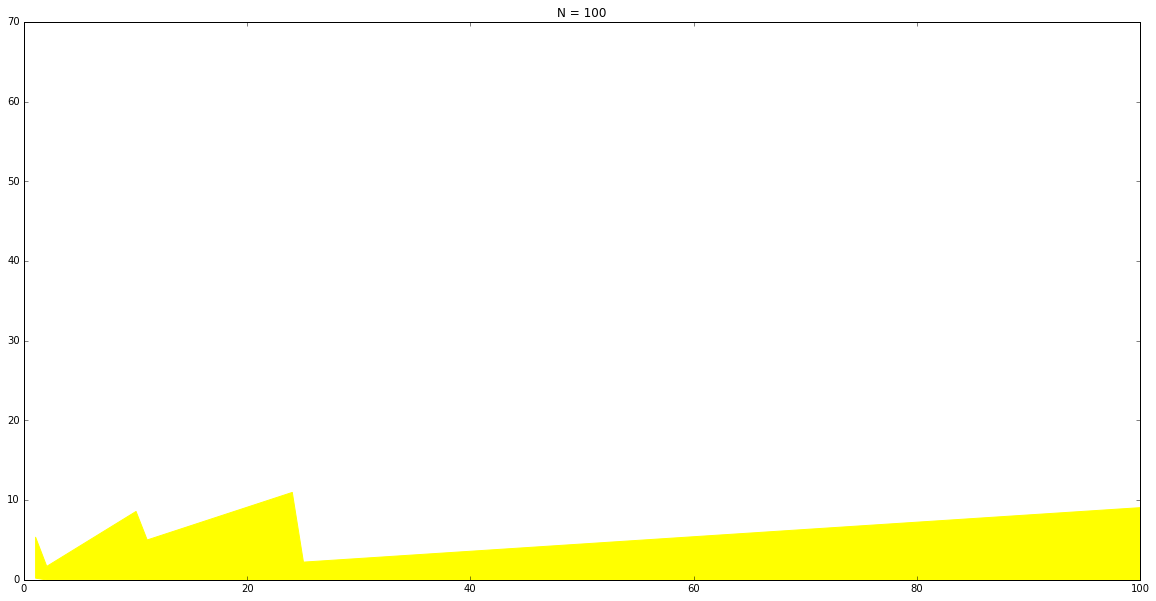

In [40]:
test_interval((lambda n: nmp.random.uniform(0, 1, n)), 
              1,
              (lambda x, n: nmp.min(x)), 
              (lambda x, n: nmp.min(x) / (1 - alpha ** (1 / n))),
              [10, 100])

build_interval(nmp.random.uniform(0, 1, N), 
              (lambda x, n: nmp.min(x)), 
              (lambda x, n: nmp.min(x) / (1 - alpha ** (1 / n))),
              0, 70)

Точный доверительный интервал для $U(0, \theta)$ - $(X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}})$. 

[0.949, 0.957]


C:\Users\Irina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


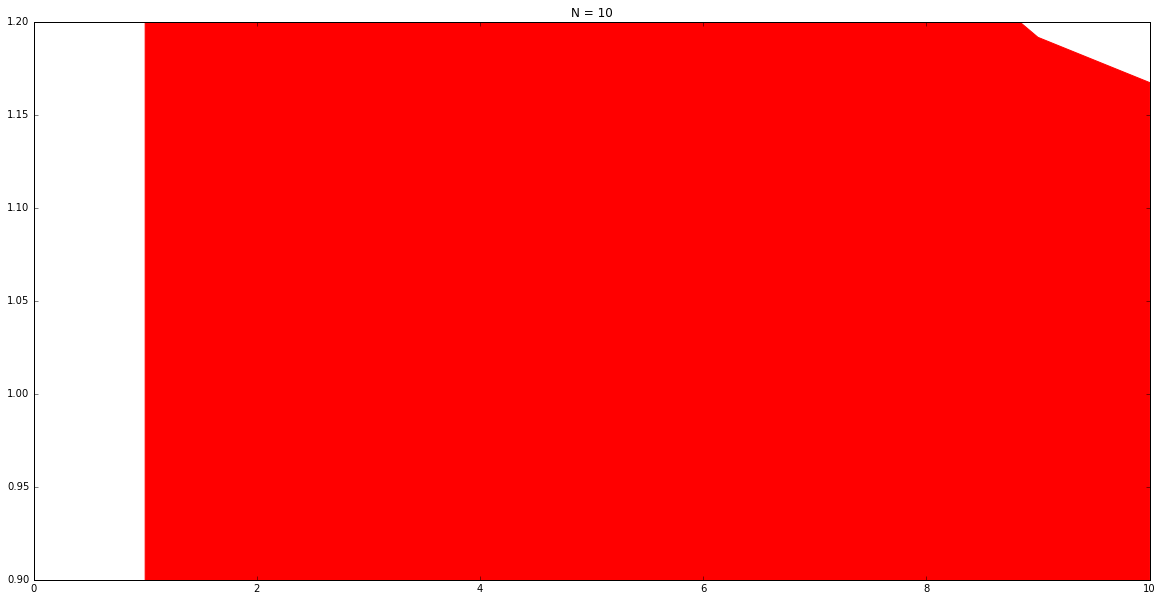

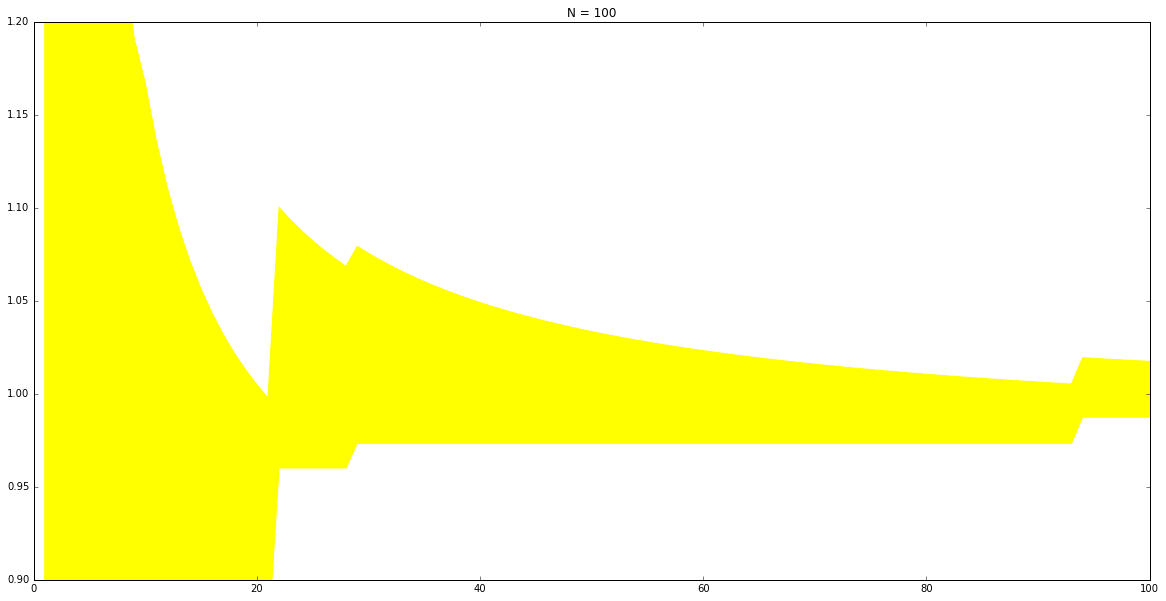

In [41]:
test_interval((lambda n: nmp.random.uniform(0, 1, n)), 
              1,
              (lambda x, n: nmp.max(x)), 
              (lambda x, n: nmp.max(x) / ((1 - alpha) ** (1 / n))),
              [10, 100])

build_interval(nmp.random.uniform(0, 1, N), 
              (lambda x, n: nmp.max(x)), 
              (lambda x, n: nmp.max(x) / ((1 - alpha) ** (1 / n))),
              0.9, 1.2)

Точный доверительный интервал для $U(0, \theta)$ - это $(X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}})$. 

[0.913, 0.954]


C:\Users\Irina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


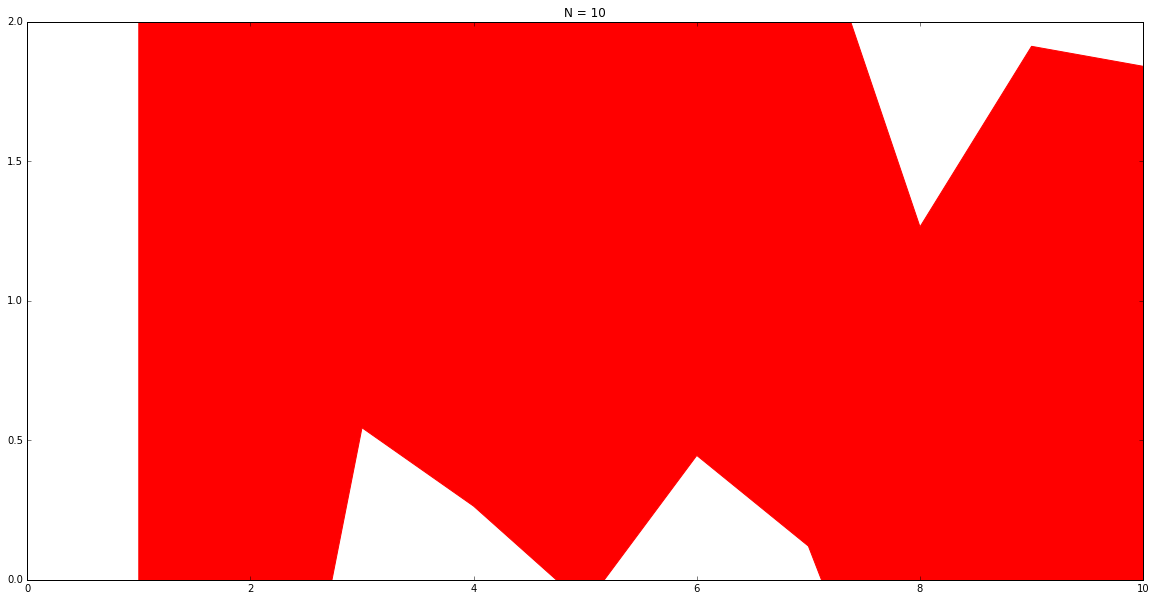

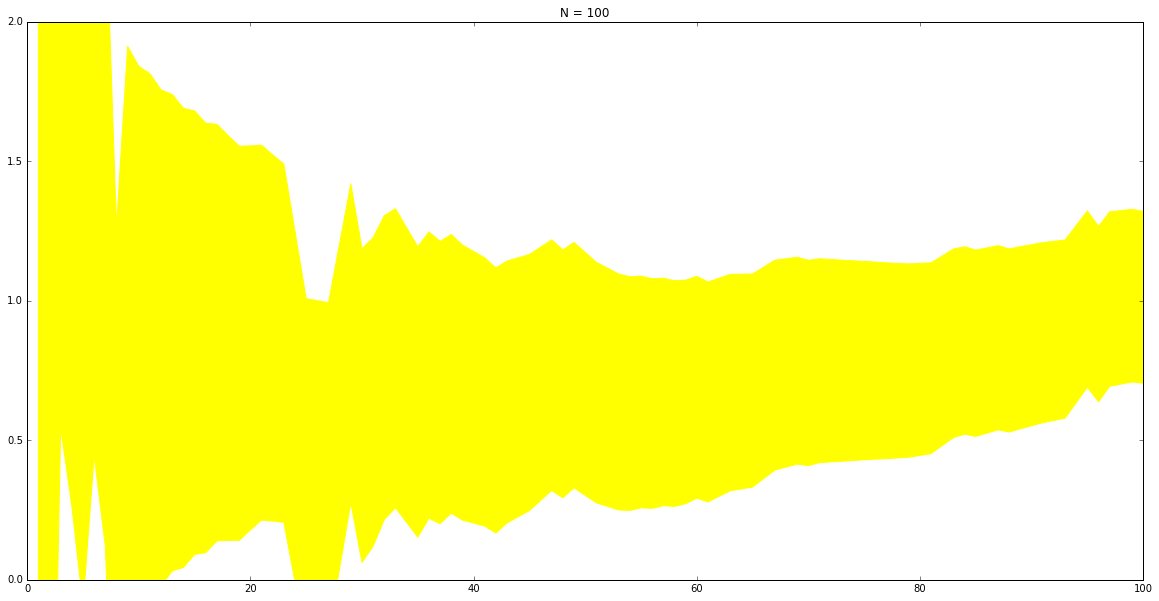

In [42]:
z = sts.norm.ppf(0.5 + alpha / 2)
test_interval((lambda n: nmp.random.standard_cauchy(n) + 1), 
              1,
              (lambda x, n: nmp.median(x) - nmp.pi * z / (2 * (n ** 0.5))), 
              (lambda x, n: nmp.median(x) + nmp.pi * z / (2 * (n ** 0.5))),
              [10, 100])

build_interval(nmp.random.standard_cauchy(N) + 1, 
              (lambda x, n: nmp.median(x) - nmp.pi * z / (2 * (n ** 0.5))), 
              (lambda x, n: nmp.median(x) + nmp.pi * z / (2 * (n ** 0.5))),
              0, 2)

Асимптотический доверительный интервал для $Cauchy(\theta, 1)$ - это $(\mu - \frac{\pi z} {2 \sqrt{n}}, \mu + \frac{\pi z} {2 \sqrt{n}})$

[0.941, 0.935]


C:\Users\Irina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


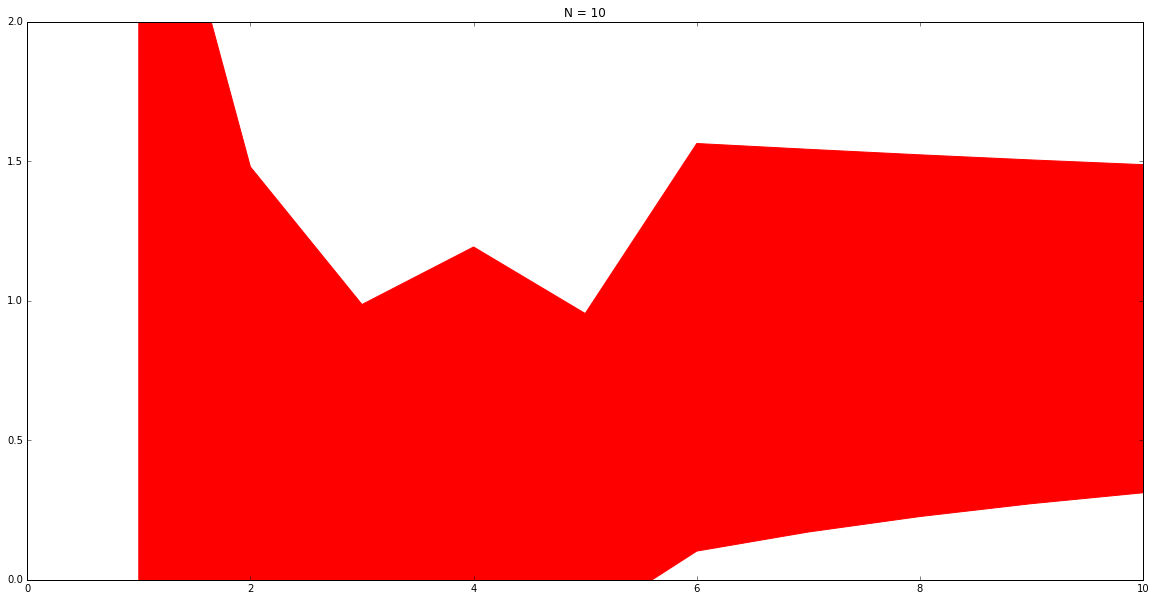

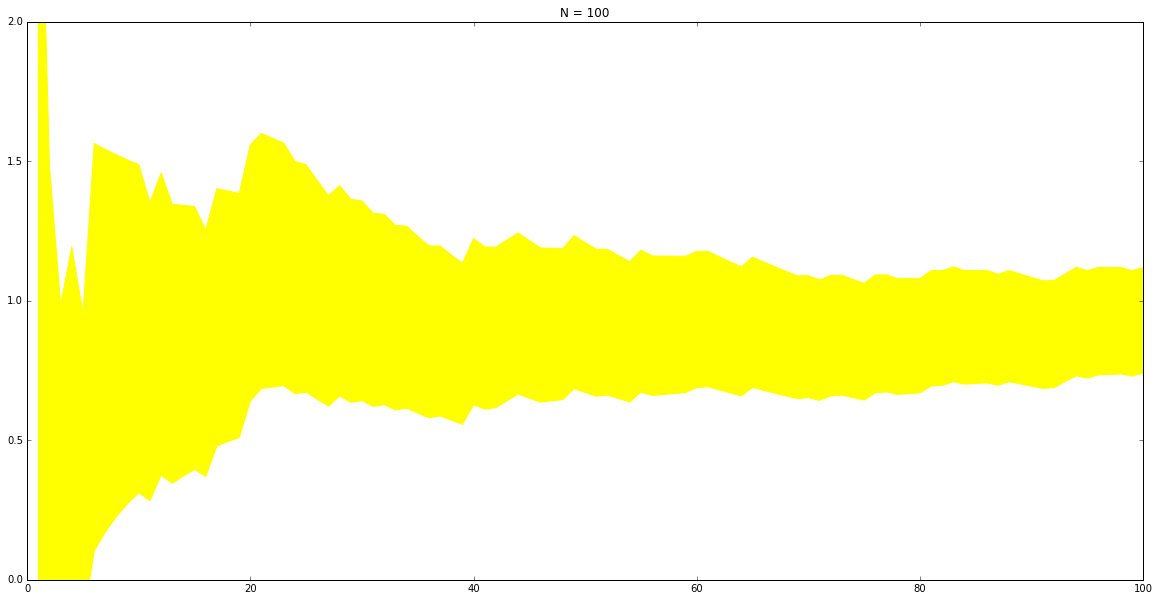

In [43]:
z = sts.norm.ppf(0.5 + alpha / 2)
test_interval((lambda n: nmp.random.poisson(1, n)), 
              1,
              (lambda x, n: nmp.mean(x) - z * (nmp.mean(x) / n) ** 0.5), 
              (lambda x, n: nmp.mean(x) + z * (nmp.mean(x) / n) ** 0.5),
              [10, 100])

build_interval(nmp.random.poisson(1, N), 
              (lambda x, n: nmp.mean(x) - z * (nmp.mean(x) / n) ** 0.5), 
              (lambda x, n: nmp.mean(x) + z * (nmp.mean(x) / n) ** 0.5),
              0, 2)

Асимптотический доверительный интервал для $Pois(\theta)$ - это $(\overline X - z \frac{\overline X}{\sqrt{n}}, \overline X + z \frac{\overline X}{\sqrt{n}})$

[0.958, 0.969]


C:\Users\Irina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


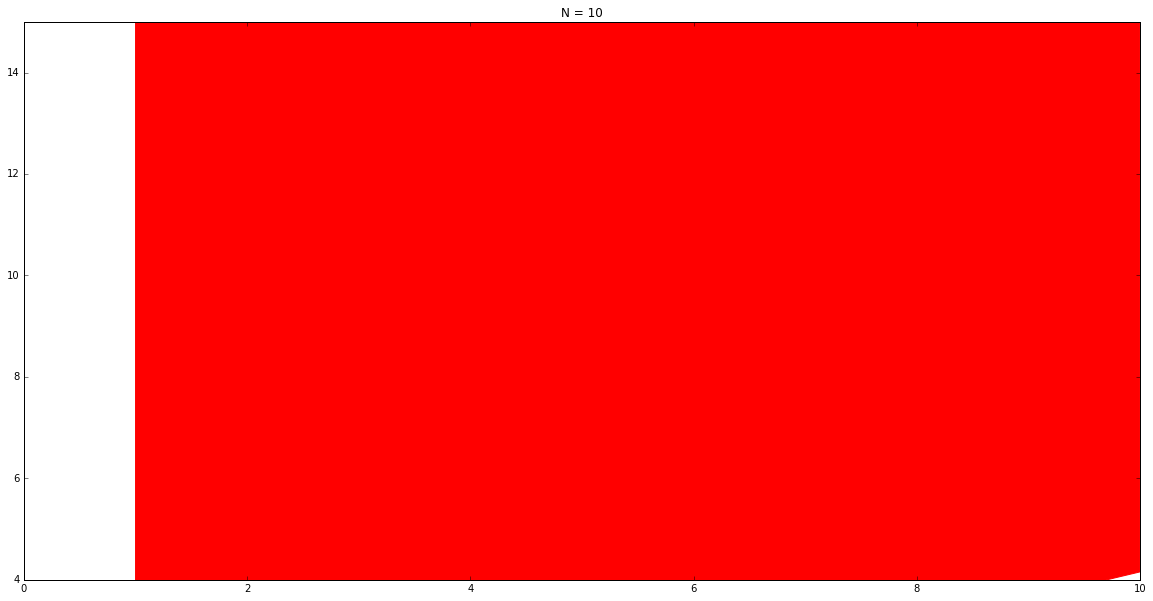

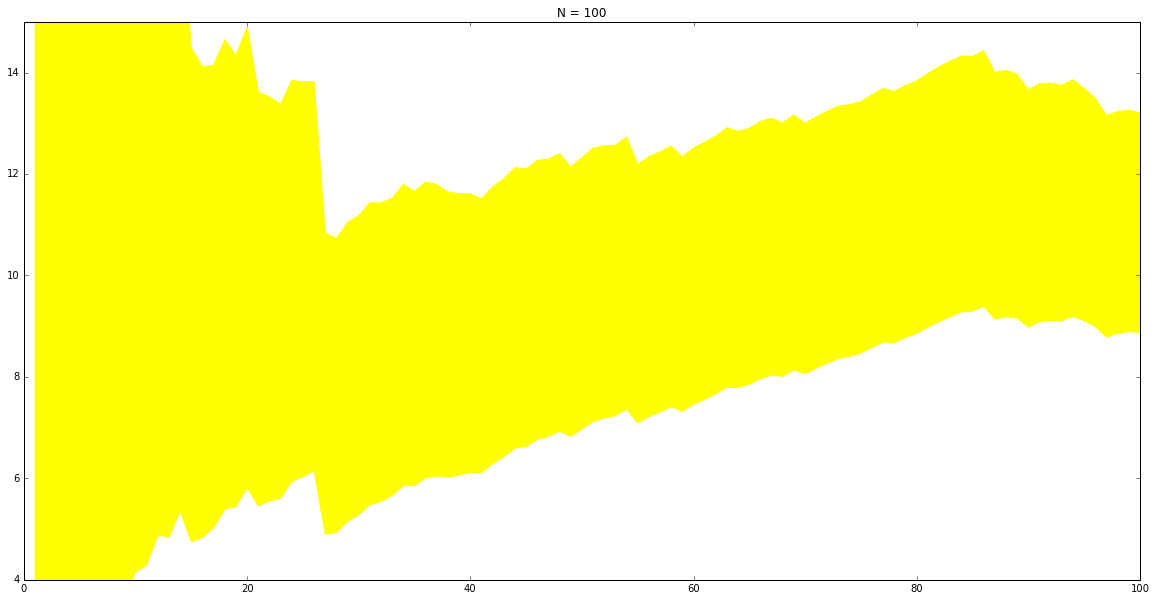

In [44]:
z = sts.norm.ppf(0.5 + alpha / 2)
_lambda = 1
test_interval((lambda n: nmp.random.gamma(_lambda, 0.1, n)), 
              10,
              (lambda x, n: (_lambda - z * (_lambda / n) ** 0.5) / nmp.mean(x)),
              (lambda x, n: (_lambda + z * (_lambda / n) ** 0.5) / nmp.mean(x)),
              [10, 100])

build_interval(nmp.random.gamma(_lambda, 0.1, N), 
              (lambda x, n: (_lambda - z * (_lambda / n) ** 0.5) / nmp.mean(x)),
              (lambda x, n: (_lambda + z * (_lambda / n) ** 0.5) / nmp.mean(x)),
              4, 15)

Асимптотический доверительный интервал для $Г(\theta, \lambda)$ -- $(\frac{\lambda - z \sqrt{\frac{\lambda}{n}}}{\overline X}, \frac{\lambda + z \sqrt{\frac{\lambda}{n}}}{\overline X})$